# *Pós-graduação em Ciência e Dados e Machine Learning*
### *Trabalho Final - Machine Learning*

**Disciplina:** Fundamentos de Machine Learning

**Professor:** André Juan Costa Vieira

**Turma:** A

**Nomes dos Integrantes:** 

1-

2-

3-

## Qualidade de vinhos. 

Você foi contratado como cientista de dados pela famosa vinícola **"Vini Tradizionali di Manduria"** para analisar todos os aspectos dos vinhos produzidos. Diversas questões foram levantadas, como: Compreender os padrões das características que proporcionam boas safras e a qualidade de novos vinhos produzidos, antes que a comunidade mundial **"Vins Spectaculaires"** os deguste, apontar quais são os novos **"blends"** que podem ter continuidade no desenvolvimento, dentre várias outras atividades que visam as boas tomadas de decisões, sempre com o intuito de servir os melhores rótulos, aumentando os lucros e diminuindo os gastos.        

A equipe de enólogos faz estudos frequentes para verificar as características de cada vinho, colocando-os em planilhas. Para melhor compreensão dos dados, descreveram o que significado de cada propriedade.   


##### Descrição 

**0. Color:** Se o vinho é tinto vermelho ou branco

**1. Fixed Acidity:** Qtd.de Ácido não volátil, aquele que não evapora fácil

**2. Volatile Acidity:** Teor de ácido acético que leva a um sabor desagradável de vinagre

**3. Citric Acid:** Um tipo de ácido que age como conservante para aumentar o nível de acidez em pequena quantidade para adicionar aroma e sabor

**4. Residual Sugar:** Qtd. de açúcar restante depois da fermentação, mais de 45g/litro é doce

**5. Chlorides:** Qtd. de sal

**6. Free Sulfur Dioxide:** Componente que impede crescimento microbiano e a oxidação do vinho

**7. Total Sulfur Dioxide:** Qtd. de SO2 (dióxido de enxofre)

**8. Density:** Densidade do vinho,

**9. pH:** Nível de acidez ou potencial hidrogeniônico

**10. Sulphates:** Um adicional que contribui para níveis de SO2 e é 
antimicróbico e antioxidante 

**11. Alcohol:** Qtd. de álcool

**12. Qualidade:** Notas de 3 a 9

# Questões

### Importe todas as bibliotecas necessárias na célula abaixo
##### Organize-as de forma crescente em relação ao tamanho da frase

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Tratamento dos Dados


Sir. Pounce, enólogo de longa data, especializado em vinhos italianos, descobriu que estão faltando alguns valores nas planilhas, e que outros dados foram alterados pelo ex-funcionário Smeagle, dispensado por degustar vinhos 'preciosos'.   

**Utilize o dataset 'wines_preprocessing.csv' para fazer as questões abaixo.**

1- Busque os valores faltantes no dataset e trate-os.

2- Busque valores incongruentes no dataset, imprima e os trate. 

3- Valide seus tratamentos com o dataset **'wines.csv'**, demonstrando se foi possível manter as distribuições de forma adequada.

In [2]:
vinhos_dataset = pd.read_csv("C:\\Users\\anton\\OneDrive\\Documentos\\Ciência de Dados\\Intro ao ML\\Prova Final\\wines_pre_processing.csv")

In [3]:
vinhos_dataset.head()

,Unnamed: 0,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,white,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99,3.28,0.51,13.4,6
1,1,red,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.4,0.75,9.8,5
2,2,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.9898,3.28,0.36,12.7,9
3,3,white,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.9962,3.42,0.4,9.3,7
4,4,white,7.1,0.2,0.34,16.0,0.05,51.0,166.0,0.9985,3.21,0.6,9.2,6


In [4]:
vinhos_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            6497 non-null   int64 
 1   color                 6494 non-null   object
 2   fixed acidity         6490 non-null   object
 3   volatile acidity      6495 non-null   object
 4   citric acid           6493 non-null   object
 5   residual sugar        6495 non-null   object
 6   chlorides             6490 non-null   object
 7   free sulfur dioxide   6495 non-null   object
 8   total sulfur dioxide  6496 non-null   object
 9   density               6496 non-null   object
 10  pH                    6495 non-null   object
 11  sulphates             6491 non-null   object
 12  alcohol               6493 non-null   object
 13  quality               6497 non-null   object
dtypes: int64(1), object(13)
memory usage: 710.7+ KB


In [5]:

# Converta as colunas para 'float'
vinhos_dataset['fixed acidity'] = pd.to_numeric(vinhos_dataset['fixed acidity'], errors='coerce')
vinhos_dataset['volatile acidity'] = pd.to_numeric(vinhos_dataset['volatile acidity'], errors='coerce')
vinhos_dataset['citric acid'] = pd.to_numeric(vinhos_dataset['citric acid'], errors='coerce')
vinhos_dataset['residual sugar'] = pd.to_numeric(vinhos_dataset['residual sugar'], errors='coerce')
vinhos_dataset['chlorides'] = pd.to_numeric(vinhos_dataset['chlorides'], errors='coerce')
vinhos_dataset['free sulfur dioxide'] = pd.to_numeric(vinhos_dataset['free sulfur dioxide'], errors='coerce')
vinhos_dataset['total sulfur dioxide'] = pd.to_numeric(vinhos_dataset['total sulfur dioxide'], errors='coerce')
vinhos_dataset['density'] = pd.to_numeric(vinhos_dataset['density'], errors='coerce')
vinhos_dataset['pH'] = pd.to_numeric(vinhos_dataset['pH'], errors='coerce')
vinhos_dataset['sulphates'] = pd.to_numeric(vinhos_dataset['sulphates'], errors='coerce')
vinhos_dataset['alcohol'] = pd.to_numeric(vinhos_dataset['alcohol'], errors='coerce')
vinhos_dataset['quality'] = pd.to_numeric(vinhos_dataset['quality'], errors='coerce')

# Verifique o tipo das colunas
print(vinhos_dataset.dtypes)

Unnamed: 0                int64
color                    object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object


In [6]:
print(vinhos_dataset['color'].unique())

['white' 'red' 'dois' 'leonidas, para te arrumar essas "confusão"' 'amo'
 'vinho ruim' nan 'deep learning' 'my precious' 'vai dar não' 'bart' 'ml']


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
color_mapping = {'white': 1, 'red': 2}
le.fit(list(color_mapping.keys()) + ['other'])  # Adicione 'other' ao fit

# Transformar apenas as classes 'white' e 'red'
vinhos_dataset['color'] = vinhos_dataset['color'].apply(lambda x: le.transform([x])[0] if x in color_mapping else 3)

In [8]:
print(vinhos_dataset['color'])

0       2
1       1
2       2
3       2
4       2
       ..
6492    2
6493    2
6494    2
6495    2
6496    2
Name: color, Length: 6497, dtype: int64


In [9]:
valores_filtrados1 = vinhos_dataset[vinhos_dataset['color' ] == 1]
valores_filtrados2 = vinhos_dataset[vinhos_dataset['color' ] == 2]
valores_filtrados3 = vinhos_dataset[vinhos_dataset['color' ] == 3]

print(len(valores_filtrados1))
print(len(valores_filtrados2))
print(len(valores_filtrados3))

1596
4887
14


In [10]:
vinhos_dataset.describe()

,Unnamed: 0,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6479.000000,6484.000000,6482.000000,6484.000000,6479.000000,6484.000000,6485.000000,6485.000000,6484.000000,6480.000000,6482.000000,6492.000000
mean,3248.000000,1.756503,7.215720,0.339736,0.318564,5.446653,0.056057,30.527298,115.763685,0.994697,3.218489,0.531369,10.491628,5.818238
std,1875.666681,0.434218,1.296388,0.164756,0.145237,4.760773,0.035070,17.745948,56.545574,0.003000,0.160816,0.148801,1.192386,0.873048
min,0.000000,1.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1624.000000,2.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,3248.000000,2.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,4872.000000,2.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,6496.000000,3.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [11]:
print(vinhos_dataset['color'])

0       2
1       1
2       2
3       2
4       2
       ..
6492    2
6493    2
6494    2
6495    2
6496    2
Name: color, Length: 6497, dtype: int64


In [12]:
vinhos_dataset.columns

Index(['Unnamed: 0', 'color', 'fixed acidity', 'volatile acidity',
       'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [13]:
vinhos_dataset.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
round(vinhos_dataset.isnull().sum() / len(vinhos_dataset) * 100, 4)

color                   0.0000
fixed acidity           0.2771
volatile acidity        0.2001
citric acid             0.2309
residual sugar          0.2001
chlorides               0.2771
free sulfur dioxide     0.2001
total sulfur dioxide    0.1847
density                 0.1847
pH                      0.2001
sulphates               0.2617
alcohol                 0.2309
quality                 0.0770
dtype: float64

In [15]:
from sklearn.impute import KNNImputer

# Impute os dados nulos usando o KNN
imputer = KNNImputer(n_neighbors=3)  # Você pode ajustar o número de vizinhos conforme necessário, no caso usamos 3 vizinhos
vinhos_limpo_imputed = imputer.fit_transform(vinhos_dataset)

# Crie um novo dataframe com os dados imputados
vinhos_dataset_imputed = pd.DataFrame(vinhos_limpo_imputed, columns=vinhos_dataset.columns)

# Verifique a porcentagem de dados nulos no novo dataframe
vinhos_datanull = (vinhos_dataset_imputed.isnull().sum() / len(vinhos_dataset_imputed)) * 100
print(vinhos_datanull)

color                   0.0
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64


In [16]:
round(vinhos_dataset_imputed.isnull().sum() / len(vinhos_dataset_imputed) * 100, 4)

color                   0.0
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

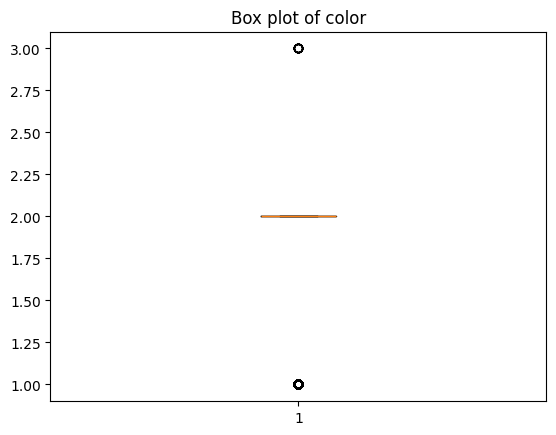

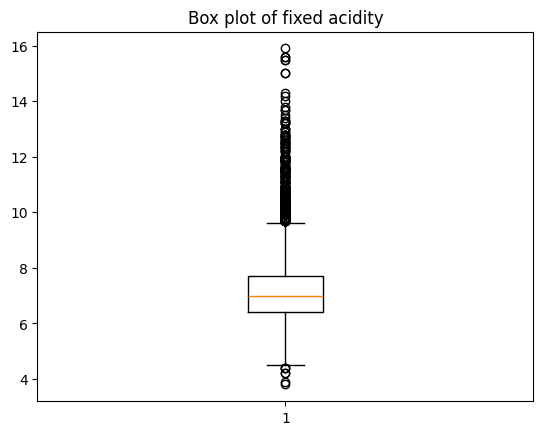

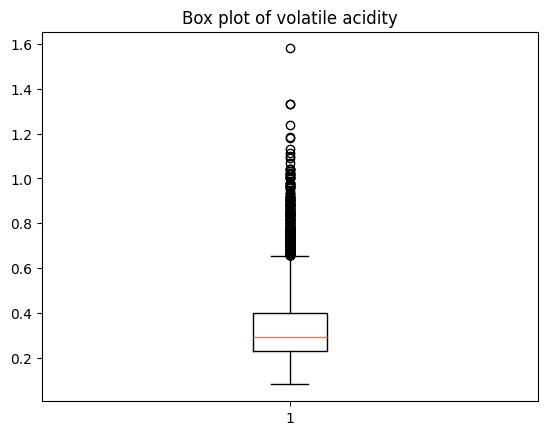

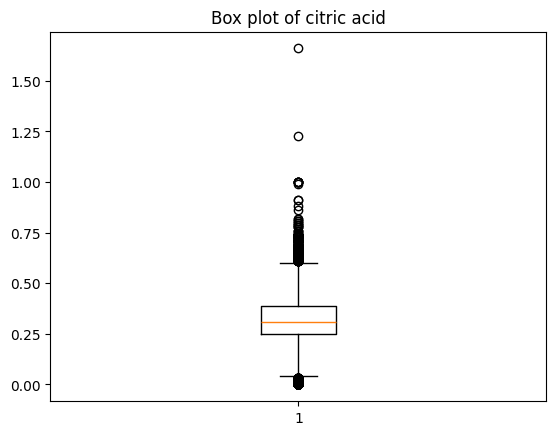

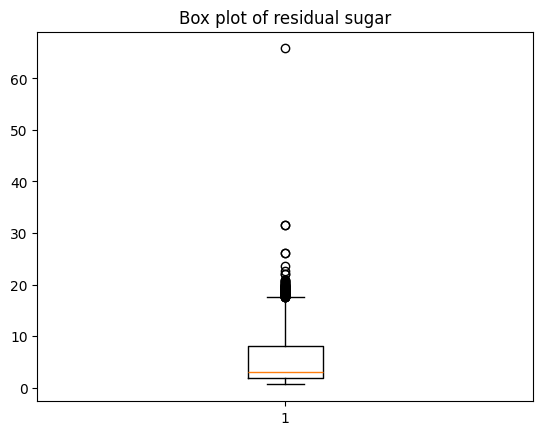

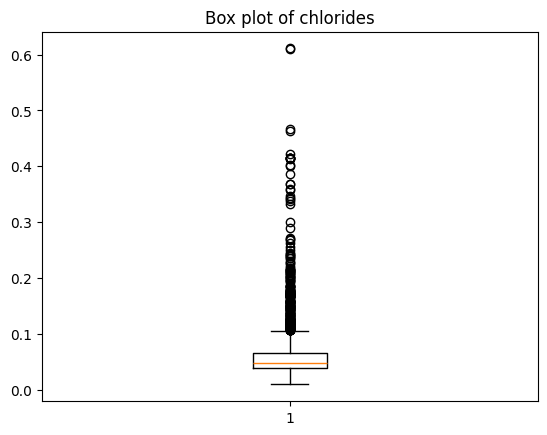

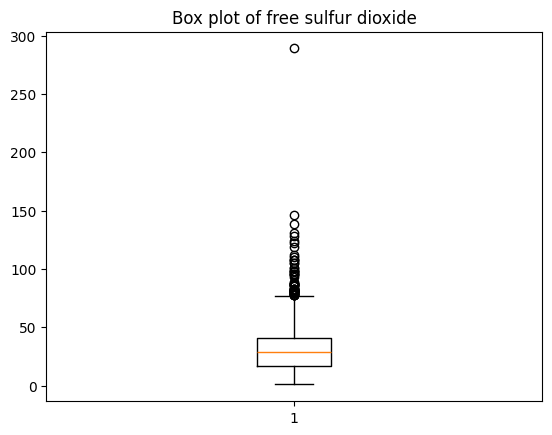

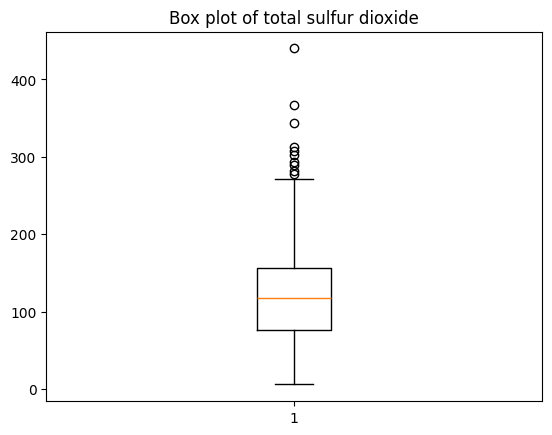

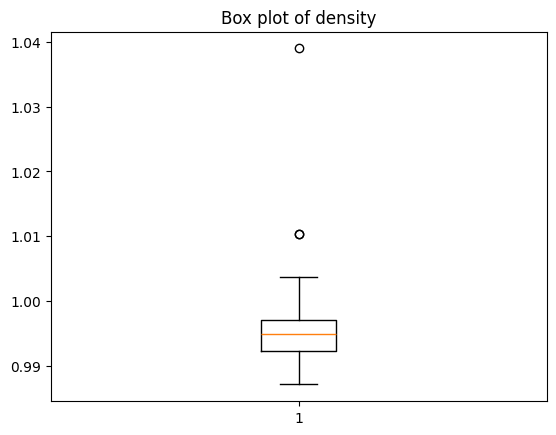

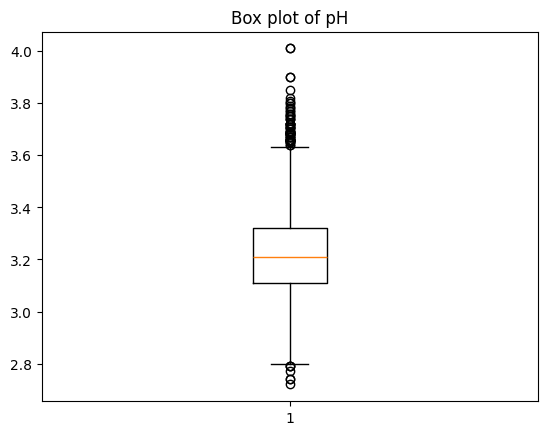

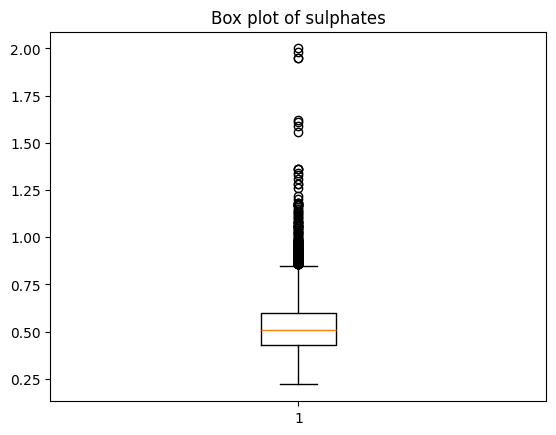

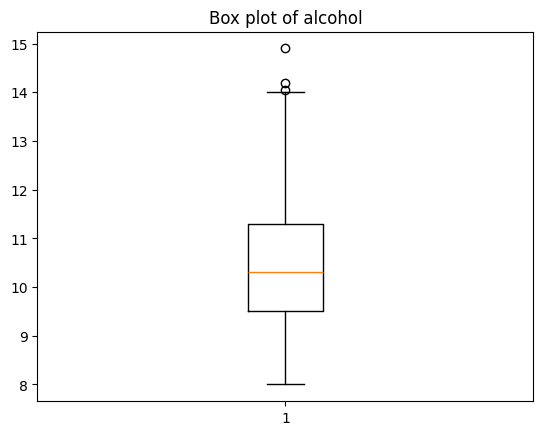

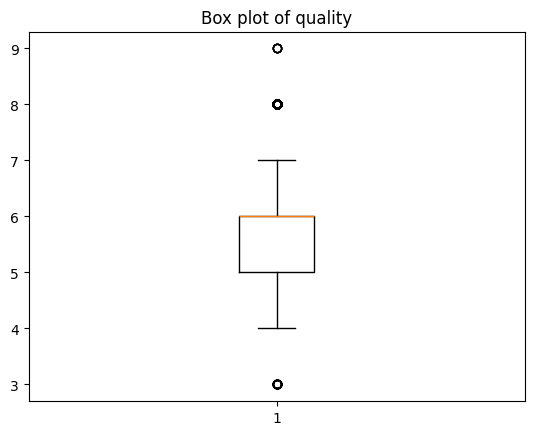

In [17]:
import matplotlib.pyplot as plt

# Inspeção visual usando boxplots

for column in vinhos_dataset_imputed.columns:
    if vinhos_dataset_imputed[column].dtype in ['int64', 'float64']:
        plt.boxplot(vinhos_dataset_imputed[column])
        plt.title(f"Box plot of {column}")
        plt.show()

In [18]:
vinhos_dataset_imputed.describe()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,1.756503,7.215610,0.339679,0.318523,5.444957,0.056044,30.519932,115.744215,0.994698,3.218518,0.531359,10.491329,5.818429
std,0.434218,1.295129,0.164633,0.145325,4.757855,0.035036,17.742552,56.523292,0.002999,0.160729,0.148720,1.191980,0.872806
min,1.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,2.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,2.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,2.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,3.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [19]:
import pandas as pd
import numpy as np

# Detectando outliers usando Z-score
def detect_outliers(column):
    z_scores = np.abs((column - column.mean()) / column.std())
    outliers = z_scores > 3
    return outliers
# Z-score é a medida de quantos desvios padrão um valor está distante da média
for column in vinhos_dataset_imputed.columns:
    if vinhos_dataset_imputed[column].dtype in ['int64', 'float64']:
        outliers = detect_outliers(vinhos_dataset_imputed[column])
        print(f"Outliers in {column}: {outliers.sum()}")

Outliers in color: 0
Outliers in fixed acidity: 128
Outliers in volatile acidity: 95
Outliers in citric acid: 28
Outliers in residual sugar: 26
Outliers in chlorides: 107
Outliers in free sulfur dioxide: 36
Outliers in total sulfur dioxide: 8
Outliers in density: 3
Outliers in pH: 33
Outliers in sulphates: 75
Outliers in alcohol: 2
Outliers in quality: 35


In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler_vinho = StandardScaler()
# limpeza_data_scaled = scaler_vinho.fit_transform(vinhos_dataset_imputed)

In [ ]:
# print(limpeza_data_scaled)

In [ ]:
# limpeza_data_scaled = pd.DataFrame(limpeza_data_scaled)

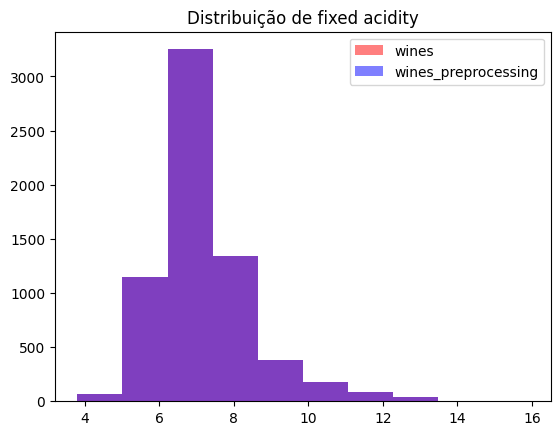

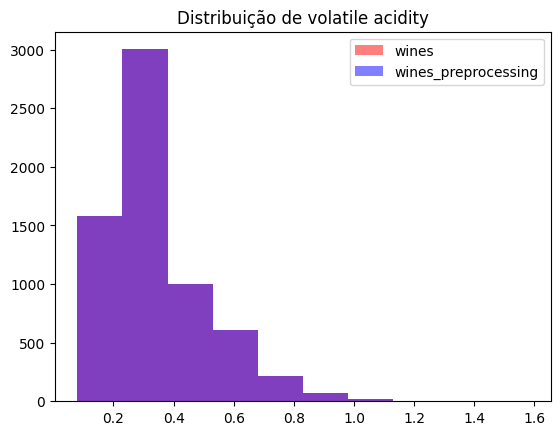

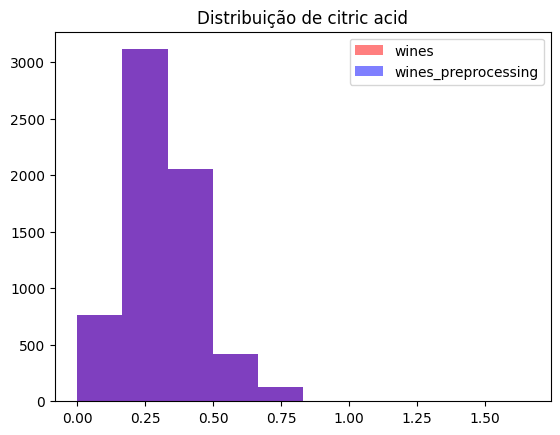

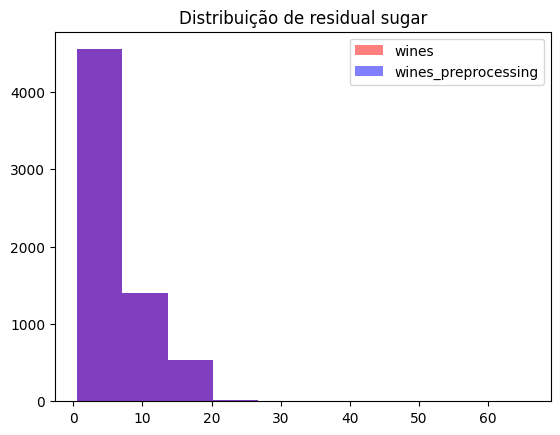

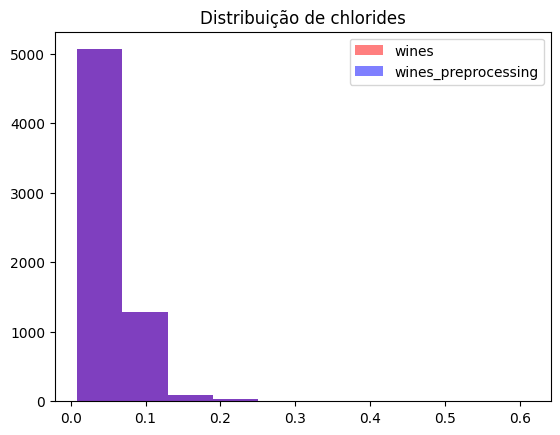

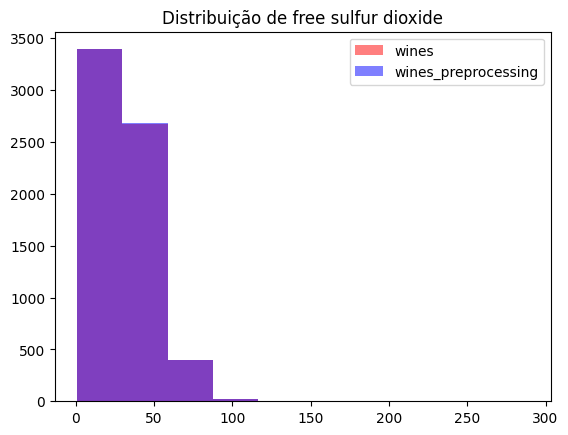

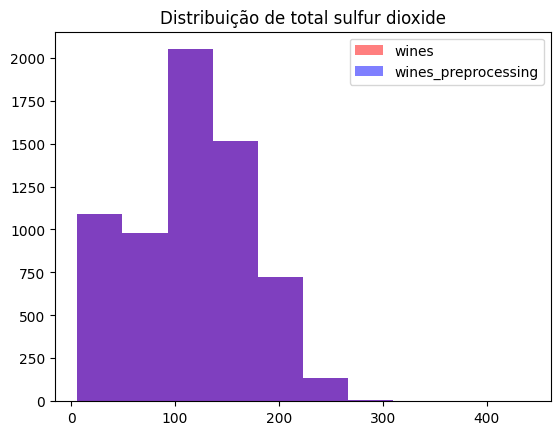

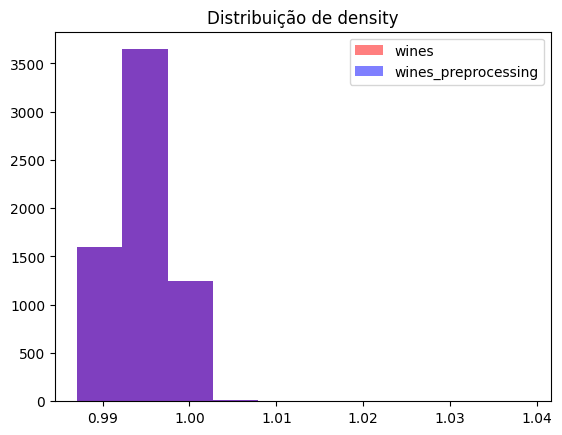

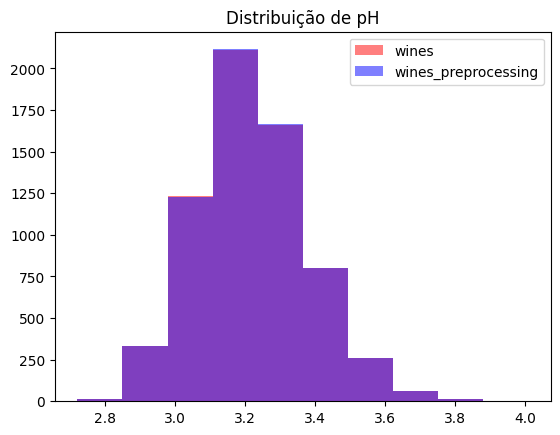

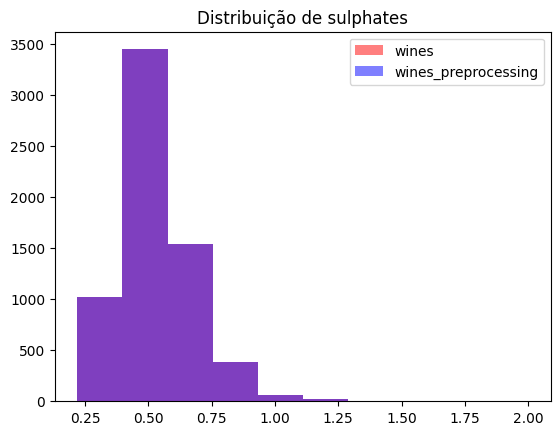

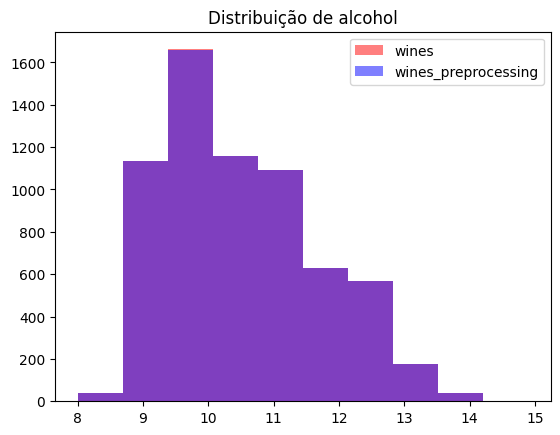

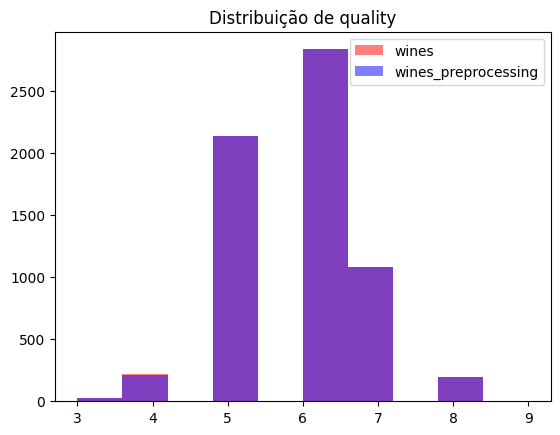

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregue o dataset 'wines.csv'
wines = pd.read_csv('C:\\Users\\anton\\OneDrive\\Documentos\\Ciência de Dados\\Intro ao ML\\Prova Final\\wines.csv')

# Verifique se as distribuições foram mantidas de forma adequada
for column in wines.select_dtypes(include=['int64', 'float64']).columns:
    plt.hist(wines[column], alpha=0.5, label='wines', color='red')
    plt.hist(vinhos_dataset_imputed[column], alpha=0.5, label='wines_preprocessing', color='blue')
    plt.title(f"Distribuição de {column}")
    plt.legend()
    plt.show()

In [21]:
vinhos_dataset.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,0.51,13.4,6.0
1,1,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5.0
2,2,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9.0
3,2,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,0.40,9.3,7.0
4,2,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,0.60,9.2,6.0


In [22]:
vinhos_dataset_imputed.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.0,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,0.51,13.4,6.0
1,1.0,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5.0
2,2.0,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9.0
3,2.0,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,0.40,9.3,7.0
4,2.0,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,0.60,9.2,6.0


In [23]:
wines.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,0.51,13.4,6
1,red,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5
2,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
3,white,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,0.40,9.3,7
4,white,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,0.60,9.2,6


In [24]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [25]:
print(wines['color'].mode())

0    white
Name: color, dtype: object


O dono da vinícola, Sir. Donald Shelby, tem um filho cursando especialização em ciência de dados, que, ao deparar-se com o dataset, pediu a você que, ao invés de ficar tratando dados com 'essas' técnicas triviais, fizesse um algoritmo de regressão logística para encontrar os valores faltantes na coluna 'Alcohol'. O Sr. Shelby é um homem conhecido como mafioso e considera seu filho um gênio, por isso, você, com fortes receios de sofrer consequências inusitadas por ordem do Don Corleone da atualidade, acatou o "pedido".


4- Desenvolver um algoritmo de regressão logística visando preencher os dados faltantes da coluna "Alcohol". Em seguida, valide os resultados com o dataset **"wines.csv"**, apresentando todas as métricas de classificação estudadas. 

5- Você, ao ver os resultados encontrados, se adiantou e fez um modelo de regressão polinomial para dirimir a questão. Em seguida, validou os resultados com o dataset **"wines.csv"**, utilizando todas as métricas de regressão estudadas. Por fim, escreverá um e-mail explicando o motivo <u>técnico</u> que o levou a não utilizar a regressão logística neste problema, bem como qual a melhor técnica que encontrou para tratar os valores faltantes.

In [26]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

# Criar uma máscara para excluir a coluna "alcohol"
mask = vinhos_dataset.columns!= 'alcohol'

# Selecionar as colunas que não são "alcohol"
X = vinhos_dataset.loc[:, mask]

# Imputar os dados nulos usando o KNN
imputer = KNNImputer(n_neighbors=3)  
X_imputed = imputer.fit_transform(X)

# Criar um novo dataframe com os dados imputados
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Concatenar a coluna "alcohol" original com o dataframe imputado
vinhos_dataset_imputed = pd.concat([X_imputed_df, vinhos_dataset[['alcohol']]], axis=1)

# Verificar a porcentagem de dados nulos no novo dataframe
vinhos_datanull = (vinhos_dataset_imputed.isnull().sum() / len(vinhos_dataset_imputed)) * 100
print(vinhos_datanull)

color                   0.000000
fixed acidity           0.000000
volatile acidity        0.000000
citric acid             0.000000
residual sugar          0.000000
chlorides               0.000000
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.000000
sulphates               0.000000
quality                 0.000000
alcohol                 0.230876
dtype: float64


In [27]:
vinhos_dataset_imputed['alcohol'] = vinhos_dataset_imputed['alcohol'].fillna(vinhos_dataset_imputed['alcohol'].mean())

In [ ]:
from sklearn.linear_model import LogisticRegression

# Criar o modelo de regressão logística
model = LogisticRegression()

# Selecionar as colunas que não têm dados faltantes
X = vinhos_dataset_imputed.drop(['alcohol'], axis=1)

# Selecionar a coluna que tem dados faltantes
y = vinhos_dataset_imputed['alcohol']

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Prever os valores faltantes
y_pred = model.predict(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Selecionar as colunas que não têm dados faltantes
X = vinhos_dataset_imputed.drop(['fixed acidity', 'volatile acidity','citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates','quality'], axis=1)

# Selecionar a coluna que tem dados faltantes
y = vinhos_dataset_imputed['alcohol']

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão logística
model = LogisticRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Prever os valores faltantes
y_pred = model.predict(X_test)

### Análise Exploratória
**Utilize o dataset 'wines.csv'**

A enóloga Marilyn Monroe, direta do Sir. Pounce, tomou conhecimento de suas habilidades exploratórias e requereu gráficos "chiques, reuscados, enfeitados e nada triviais" que mostrassem, de forma interativa todos os dados e seus respectivos insights. A principal exigência é de que as paletas de cores sejam harmônicas, de modo que possam ser utilizadas em apresentações. Para isso, sugeriu a documentação a seguir:
[Colors Palettes](https://plotly.com/python/builtin-colorscales/)

1- Utilize um countplot para averiguar a quantidade de vinhos por cada avaliação de qualidade. 
Separare entre vinhos tintos e brancos, fazendo um gráfico para cada tipo.

2- Utilize um jointplot para descrever a relação entre álcool e açucar. Utilizar o tipo 'KDE'.

3- Utilize um boxplot para verificar se existe algum vinho que seja considerado um outlier. Utilize **x = 'quality'** e **y='residual sugar'**. Identificando os outliers, crie um novo dataframe, utilize um barplot para contabilizar a quantidade de vinhos tintos
e brancos por qualidade de modo que as barras estejam sobrepostas em relação ao tipo de vinho.   

4- Faça um gráfico de correlação e encontre quais são as 'features' que contém correlações
positivas e negativas fortes  entre si. Em seguida, utilize o scatterplot, colocando no eixo "x" e "y"
cada variável correlata e descreva por escrito o motivo da distribuição e o sentido vetorial estarem apresentados
das respectivas formas.

**ps**: Para este problema, entenda como correlações fortes valores menores que -0.4 e maiores que 0.4.

In [28]:
wines.head()


,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,0.51,13.4,6
1,red,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5
2,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
3,white,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,0.40,9.3,7
4,white,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,0.60,9.2,6


In [29]:
import plotly.express as px

# Separar os vinhos tintos e brancos
red_wines = wines[wines['color'] == 'red']
white_wines = wines[wines['color'] == 'white']

# Countplot para vinhos tintos
fig_red = px.histogram(red_wines, x='quality', color='quality', title='Quantidade de Vinhos Tintos por Qualidade',
                       color_discrete_sequence=px.colors.sequential.Plasma)
fig_red.update_layout(bargap=0.2)
fig_red.show()

# Countplot para vinhos brancos
fig_white = px.histogram(white_wines, x='quality', color='quality', title='Quantidade de Vinhos Brancos por Qualidade',
                         color_discrete_sequence=px.colors.sequential.Plasma)
fig_white.update_layout(bargap=0.2)
fig_white.show()


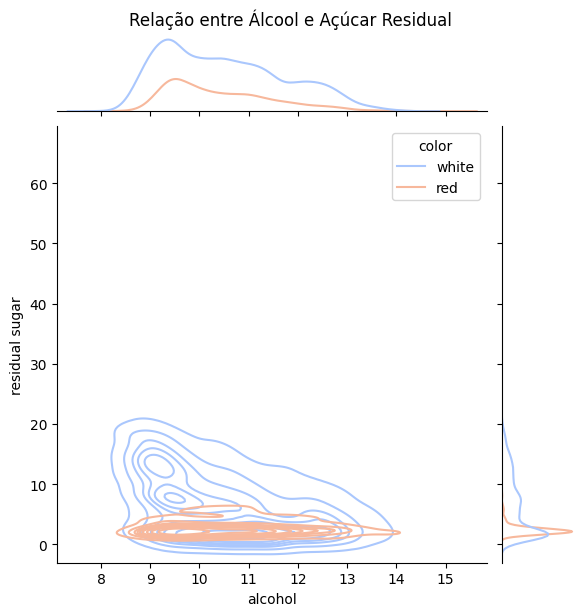

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar a paleta de cores para o seaborn
sns.set_palette('coolwarm')

# Jointplot com KDE
sns.jointplot(data=wines, x='alcohol', y='residual sugar', kind='kde', hue='color', palette='coolwarm')
plt.suptitle('Relação entre Álcool e Açúcar Residual', y=1.02)
plt.show()


In [31]:
# Boxplot para verificar outliers
fig_box = px.box(wines, x='quality', y='residual sugar', color='color', title='Boxplot de Açúcar Residual por Qualidade',
                 color_discrete_sequence=px.colors.sequential.Viridis)
fig_box.show()

# Identificar outliers
Q1 = wines['residual sugar'].quantile(0.25)
Q3 = wines['residual sugar'].quantile(0.75)
IQR = Q3 - Q1
outliers = wines[(wines['residual sugar'] < (Q1 - 1.5 * IQR)) | (wines['residual sugar'] > (Q3 + 1.5 * IQR))]

# Remover outliers
wines_no_outliers = wines[~wines.index.isin(outliers.index)]

# Barplot para contabilizar a quantidade de vinhos tintos e brancos por qualidade
fig_bar = px.histogram(wines_no_outliers, x='quality', color='color', barmode='overlay',
                       title='Quantidade de Vinhos por Qualidade (Sem Outliers)',
                       color_discrete_sequence=px.colors.qualitative.Set3)
fig_bar.show()


In [32]:
corr_matrix = wines.corr()

C:\Users\anton\AppData\Local\Temp\ipykernel_33428\3412270316.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [37]:
import plotly.express as px
import pandas as pd

corr_matrix = wines.corr()

corr_matrix = wines.corr()

fig = px.imshow(corr_matrix, color_continuous_scale='RdBu_r', text_auto=True)
fig.update_layout(title='Correlation Matrix', width=800, height=800)
fig.show()

C:\Users\anton\AppData\Local\Temp\ipykernel_33428\2929609247.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\anton\AppData\Local\Temp\ipykernel_33428\2929609247.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [34]:
fig = px.scatter(wines, x='alcohol', y='density')
fig.update_layout(title='Alcohol vs Density', xaxis_title='Alcohol', yaxis_title='Density')
fig.show()

In [35]:
fig = px.scatter(wines, x='sulphates', y='pH')
fig.update_layout(title='Sulphates vs pH', xaxis_title='Sulphates', yaxis_title='pH')
fig.show()

In [36]:
fig = px.scatter(wines, x='alcohol', y='residual sugar')
fig.update_layout(title='Alcohol vs Residual Sugar', xaxis_title='Alcohol', yaxis_title='Residual Sugar')
fig.show()

# Modelos Supervisionados 

### Classificação
**Utilize o dataset 'wine_classification.csv'.**

Após alguns meses, o filho do Sir. Donald Shelby, Chuck Norris Shelby, mais conhecido como "El Chavo del Ocho", em decorrência de seu "notório" saber e comportamento extrovertido, ~para ser eufemista~, foi promovido a "*head*" de Machine Learning, vulgo seu chefe. 

Com suas inusitadas e inovadoras ideias, pediu que você criasse três modelos de árvores, um do tipo "random" e dois do tipo "boost", pois havia descoberto que a otimização pelo gradiente descendente era considerada como "*The American Dream*". Não obstante, gostaria de analisar o gráfico de importância das features.

Ademais, requereu que utilizasse o algoritmo SVM, pelo fato do "kernel trick" performar bem em problemas de altas dimensionalidades. Um KNN "cairia bem também, vamos utilizar por mero desencargo de consciência", disse.  

Em seu discurso inflamado, se pronunciava: "Precisamos realizar tais façanhas nunca vistas na história da Inteligência Artificial, desde que as redes neurais foram introduzidas por Walter Pitts e Warren McCulloch em 1943. Vamos predizer tudo que quisermos, independentemente da uva utilizada na produção. Eu transformarei nossa vinícola na melhor do mundo, pois sou detentor do saber". Tudo dito numa reunião contendo 12 pessoas, trabalhadores braçais inclusos. Tal discurso invejou os oráculos delfos e os lembraram de Sócrates em seu julgamento, antes de morrer. 

Após tamanhas proclamações, apontou em sua direção e disse: **"VOCÊ, É..., VOCÊ MESMO**, irás fazer todo o processo por conta própria, e eu direi se o que fazes está correto! Não utilizarás Auto-ML, pois eu, ~professor~, quero ter certeza de que entende seu labor e suas nuâncias". 

Você, cansado e entediado de tantas lorotas, se retirou da reunião com "dores" na região abdominal, porém ainda recebeu um e-mail lhe instruindo a comparar os resultados de todas as implementações, escolher o melhor modelo e utilizar métodos de otimização de hiperparâmetro.  

Em suma?

1- Crie um pipeline que contenha ao menos 05 tipos diferentes de algoritmos de classificação. 

2- Crie um DataFrame que contenha todos os resultados de todos os algoritmos utilizados, inclusive a métrica ROC AUC.

3- Comparar os resultados, escolher o melhor modelo e otimizar os parâmetros. Ao fim, faça um gráfico da ROC AUC.


In [ ]:
wines_class = pd.read_csv('wine_classification.csv')

In [ ]:
wines_class.info()

Após todos seus esforços, o amado chefe lhe pediu para utilizar um algoritmo de classificação que ele ouviu falar, criado pelo matemático inglês Thomas Bayes. Cabe a você, mais uma vez aplicar o algoritmo e apresentar os resultado. Em seguida, faça uma breve explicação do principal problema desse método para solucionar problemas complexos.  

Dr. Anton Ego marcou uma data para comparecer na vinícula e degustar seus melhores rótulos. Nascido na França e o enólogo mais famoso do mundo, Anton era temido pelas suas análises minuciosas e certeiras. As críticas eram tão serveras que tão severas que 80% das vinículas eram fechadas pela falta de aceitação do mercado. Apenas =~ 19.99% sobreviviam sem danos consideráveis e somente $0.1x10^{-15}$% se tornavam uma lenda.

Chuck tomava leite da papoula para suportar tamanha disruptura emocional. Sir.Donald, tomado pela a ansiedade, estava com seus pruridos mentais em Nárnia até que sua esposa, Srta.Audrey Hepburn assumiu a liderança do projeto com a serenidade de um bebê.

Primeiramente ordenou que todos os vinhos que já vinham há algum tempo em processo de envelhecimento em barricas de carvalho fossem engarrafados e que amostras de todos fossem coletadas para análise. 

Sua maior preocupação é que somente sejam servidos os vinhos de nota oito ou nove, pois ambos são de mesmíssima qualidade, ficando a avaliação a critério da subjetividade palatal do degustador. Em **<u>hipótese nenhuma</u>** um vinho que não tenha tais notas pode ser servido.

De todas as novas garrafas, serão servidas somente três que você autorizar. O Dr. Ego só toma vinho tinto!


Sabendo que você já tinha um modelo validado para solucionar este tipo de problema, pediu que o usasse com a base **'desafio.csv''**. Ao fim, crie uma célula e copie os 3 vinhos que escolheu para registrar sua resposta. 


### Modelos não Supervisionados

**Utilize o dataset 'wines.csv' e 'wines_splines.csv'**

Chuck Norris tem um amigo famoso no mundo da ciência de dados, seu nome é Rocky Balboa. Em uma conversa sobre alguns métodos que podem ser utilizados para criar novos vetores (_features engineering_), o Sr.Rocky propôs que fossem utilizados Splines. Completamente emocionado com a ideia, Chuck decidiu aplicar esta técnica utilizando até a oitava potência. 

Ele pediu a você que fizesse um estudo comparativo utilizando o PCA. O intuito é analisar se a redução de dimensionalidade pode ser vantajosa para o dataset original e o dataset com Splines. 

1- Compare a variância explicada de cada um dos datasets

2- Explique porque o PCA seria, ou não uma boa abordagem para o dataset com Splines. Ademais, discorra sobre a influência de ruídos.

3- Utilize um loop "for" e crie uma condição para que, quando a variância for maior do que 0.92, seja retornado o número de features totais, faça para ambos datasets.

**Utilize o dataset 'wines.csv'**

Uma ideia realmente interessante é a clusterização. Por vezes, podemos nos espantar com certos resultados. Aqui, você deve utilizar o dataset original e separar cada nota em um cluster. 

1- Validar os resultados do algoritmo Kmeans com o dataset original

2- Aplicar o método do Cotovelo e averiguar se o número de clusters apontados são iguais ao número de cluster que você tem de usar.

3- Utilizar o método da Silhueta e averiguar se o número de clusters apontados são iguais ao número de cluster que você tem de usar.

4- Explique os principais conceitos dos métodos das questões 2 e 3.

**Utilize o dataset 'logs_firewall.xlsx'**

A Università di Bologna tem cursos de graduação e pós graduação em enologia. Os grandes enólogos do mundo são os únicos que podem fazer o doutorado nesta renomada universidade. Esta instituição tem um contrato milionário com o Sr.Donald, onde todos os alunos poderiam comparecer uma semana a cada três meses para estudar as características, mecânicas de plantações, tecnologias, processos de confecção dos vinhos, entre outras matérias. Todos os professores, escanções extremamente bem conceituados, sempre estão presentes. 

Caso infortúnio, O Sr.Hafþór Júlíus Björnsson, mais conhecido como "o Montanha", chefe de segurança cibernética da empresa apertou o botão DEFCON-1 ao perceber que os servidores tinham sido 'hackeados'. Momento em que notou que os bancos de dados que continham as notas dos vinhos haviam sido alterados/deletados e o backup infectado por um Ransomware chamado "HUE HUE HUE BR". Aparentemente, os black-hats conseguiram alterar de 5% a 25% dos dados referentes aos vinhos tintos, antes que o Montanha conseguisse exterminar as conexões dos servidores. 

O Sr.Donald Shelby aproximou-se para falar com você sobre as políticas da empresa, criadas por sua esposa, que dispunham sobre o bem estar, ambiente não tóxico, agregação dos "colaboradores" ~pseudo escravos~ como familiares, dentre outros ideais da mesma seara. Em seguida incorporou o espírito de Don Corleone e proferiu uma de suas máximas ao falar "Política é saber a hora de puxar o gatilho".   

Uma regra clara da empresa dispõe sobre a impossibilidade de extrair datasets como arquivos e, toda vez que for utilizar os dados no Jupyter Notebook, deve ser realizado uma query no datalake. Ocorre que, 'sem querer querendo', você estava "desatento" e salvou os dados para estudos quando estivesse em casa. Nítido que se disse-se que havia copiado quaisquer dados seria torturado, por isso não poderia simplesmente colocá-los de volta no banco e, como não queria morrer, tinha de encontrar vias oblíquas para dirimir a questão. 

Erick Cartman, analista de infraestrutura, recebeu ordens para recuperar os dados a qualquer custo e, caso falhasse, seria devidamente penalizado ~executado~. Desolado, regado a fanta uva, com palavras arrastadas e chiadas, Erick lhe pediu ajuda. Com muita pena, pegou seu disquete que continha a cópia dos dados e o entregou, pedindo extrema confidencialidade.

Para sua surpresa, após ter a vida salva, receber aumentos salariais e bonificações, Erick te chantageou. "Agora pediram para eu analisar os logs do firewall que contém informações de acesso a servidores e descobrir os possíveis culpados. Eu não sei fazer isso não, 'ocê tá LOUKO'. Dá teus pulos aí se não eu te conto que você copia dados da empresa!!!"

Conhecedor de diversas técnicas para detecção de outliers, se lembrou de uma que já tinha experiência: Isolation Forest. 

1- Descubra o nome do responsável pelo o ataque.

**ps**: Recentemente houve um estudo estatístico que comprovou que existe um fator de risco em relação aos horários de acesso, são eles:  

Entre 09:00 às 12:00 o risco varia entre 0-10%

Entre 12:00 às 14:00 o risco varia entre 5-10%

Entre 14:00 às 19:00 o risco varia entre 0-10%

Entre 19:00 às 21:00 o risco varia entre 20-30%

Entre 21:00 às 23:00 o risco varia entre 40-50%

Entre 00:00 às 02:00 o risco varia entre 60-80%

Entre 02:00 às 06:00 o risco varia entre 80-100%

Entre 06:00 às 09:00 o risco varia entre 30-40%

**<u>Esse fator pode ser recriado usando o método 'random.uniform', com 'seed' = 64.</u>**